<a href="https://colab.research.google.com/github/venkatguna/Capstone--Chennai_House_Price_Prediction/blob/main/Capstone_Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Required Libraries** 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


### **Importing Training Dataset**

In [6]:
dataset=pd.read_csv('/content/gdrive/My Drive/DS Projects/train-chennai-sale.csv')

### **Initial Data Preview**

In [7]:
dataset.shape

(7109, 22)

In [8]:
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [9]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [10]:
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [11]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

### **Data Cleaning based on Initial Data Preview**

1.   PRT_ID cannot be taken as feature
2.   AREA is a multiple-class feature
3.   INT_SQFT is a continuous feature (int64 dtype - No modification required)
4.   DATE_SALE is a featuristic value (modification required)
5.   DIST MAINROAD is a continuous feature (int64 dtype - No modification required)
6.   N_BEDROOM is a continuous feature (float64 dtype - modification required [float64 => int64])
7.   N_BATHROOM is a continuous feature (float64 dtype - modification required [float64 => int64])
8.   N_ROOM is a continuous feature (int64 dtype - No modification required)
9.   SALE_COND is multiple-class feature (modification required)
10. PARK_FACIL is a binary-class feature (modification required)
11. DATE_BUILD (modification required)
12. BUILDTYPE is a multiple-class feature (modification required)
13. UTILITY_AVAIL is a multiple-class feature (modification required)
14. STREET is a multiple-class feature (modification required)
15. MZZONE is a multiple-class feature (modification required)
16. QS_ROOMS is a continuous feature (no modification required)
17. QS_BATHROOM is a continuous feature (no modification required)
18. QS_BEDROOM is a continuous feature (no modification required)
19. QS_OVERALL is a continuous feature (no modification required)
20. REG_FEE is not an important/feature to consider 
21. COMMIS is not an important/feature to consider
22. SALES_PRICE is a is continuous variable that acts as target value

Using the above listed columns we can develop a feature which is the Age of the House using DATE_BUILD and DATE_SALE values

### **Data Cleaning is done using the following steps.,**

*   Identifying the Missing values and removing the duplicate data
*   Format Incorrect Data Types 
*   Format Spelling Errors 
*   Format Outlier in Data




In [13]:
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### **Identifying the Missing values and Duplicate data**

In [14]:
dataset.isnull().sum()    

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [23]:
x=dataset['N_BEDROOM'].mode()
y=dataset['N_BATHROOM'].mode()
x,y

(0    1.0
 dtype: float64, 0    1.0
 dtype: float64)

In [28]:
dataset['N_BEDROOM']=dataset['N_BEDROOM'].fillna(1.0)
dataset['N_BATHROOM']=dataset['N_BATHROOM'].fillna(1.0)
dataset['N_BEDROOM'].unique(),dataset['N_BATHROOM'].unique()

(array([1., 2., 3., 4.]), array([1., 2.]))

In [30]:
dataset=dataset.dropna()
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [31]:
dataset.duplicated().sum()

0

### **Format Incorrect Data Types**

In [32]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [34]:
dataset['DATE_SALE'] = pd.to_datetime(dataset['DATE_SALE'])
dataset['DATE_BUILD'] = pd.to_datetime(dataset['DATE_BUILD'])

In [40]:
dataset.N_BEDROOM = dataset.N_BEDROOM.astype('int64')
dataset.N_BATHROOM = dataset.N_BATHROOM.astype('int64')
dataset.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [42]:
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Removing PRT_ID as it not a required feature

In [44]:
dataset=dataset.drop(['PRT_ID'],axis=1)
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

### **Format Spelling Errors**

Checking on AREA column 

In [45]:
dataset['AREA']=dataset['AREA'].str.replace('','')
dataset['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [52]:
dataset['AREA'].replace(['Chrompt', 'Chrmpet', 'Karapakam', 'Ana Nagar','Chormpet', 'Adyr', 'Velchery', 'Ann Nagar', 'TNagar', 'KKNagar'],
                        [ 'Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar', 'T Nagar', 'KK Nagar'],
                        inplace=True)

In [53]:
dataset['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Checking on SALE_COND column 

In [54]:
dataset['SALE_COND']=dataset['SALE_COND'].str.replace(' ','')
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale',
       'Partiall', 'PartiaLl'], dtype=object)

In [55]:
dataset['SALE_COND'].replace(['Partiall', 'PartiaLl'],['Partial', 'Partial'],inplace=True)

In [56]:
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale'],
      dtype=object)

Checking on PARK_FACIL column 

In [57]:
dataset['PARK_FACIL']=dataset['PARK_FACIL'].str.replace(' ','')
dataset['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [58]:
dataset['PARK_FACIL'].replace('Noo','No',inplace=True)

In [59]:
dataset['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

Checking on BUILDTYPE column 

In [60]:
dataset['BUILDTYPE']=dataset['BUILDTYPE'].str.replace(' ','')
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [61]:
dataset['BUILDTYPE'].replace(['Other','Comercial']
                            ,['Others', 'Commercial'],
                            inplace=True)

In [62]:
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

Checking on UTILITY_AVAIL column

In [63]:
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].str.replace(' ','')
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [72]:
dataset['UTILITY_AVAIL'].replace('NoSeWr','NoSewa',inplace=True)

In [73]:
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

Checking on STREET column

In [74]:
dataset['STREET']=dataset['STREET'].str.replace(' ','')
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess', 'Pavd'], dtype=object)

In [75]:
dataset['STREET'].replace('Pavd','Paved',inplace=True)

In [76]:
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

Checking on MZZONE column

In [77]:
dataset['MZZONE']=dataset['MZZONE'].str.replace(' ','')
dataset['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

### **Format Outliers in Data**

In [78]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


Checking on INT_SQFT column


In [79]:
outlier=[]
mean,std=1381.338479,457.785335
for i in dataset['INT_SQFT']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on DIST_MAINROAD column


In [80]:
outlier=[]
mean,std=99.583487,57.405192
for i in dataset['DIST_MAINROAD']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on N_BEDROOM	 column


In [81]:
outlier=[]
mean,std=1.636312,0.803502
for i in dataset['N_BEDROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on N_BATHROOM column


In [82]:
outlier=[]
mean,std=1.213001,0.409457
for i in dataset['N_BATHROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on N_ROOM column


In [83]:
outlier=[]
mean,std=3.686730,1.019849
for i in dataset['N_ROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on QS_ROOMS column


In [84]:
outlier=[]
mean,std=3.516910,0.892244	
for i in dataset['QS_ROOMS']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on QS_BATHROOM column


In [85]:
outlier=[]
mean,std=3.505764,0.897499
for i in dataset['QS_BATHROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on QS_BEDROOM column


In [86]:
outlier=[]
mean,std=3.485186,0.887059
for i in dataset['QS_BEDROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Checking on QS_OVERALL column


In [87]:
outlier=[]
mean,std=3.503254,0.527223
for i in dataset['QS_OVERALL']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


Construct BUILDUP_YEAR using DATE_BUILD and SALEON_YEAR using DATE_SALE and later drop both DATE_BUILD & DATE_SALE

In [91]:
dataset['BUILDUP_YEAR'] = dataset['DATE_BUILD'].dt.year
dataset['SALEON_YEAR'] = dataset['DATE_SALE'].dt.year

Construct AGE column based on the difference between SALEON_YEAR and BUILDUP_YEAR

In [92]:
dataset['AGE']=dataset['SALEON_YEAR']-dataset['BUILDUP_YEAR']

In [93]:
dataset=dataset.drop(['DATE_SALE','DATE_BUILD'],axis=1)
dataset.columns 

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDUP_YEAR', 'SALEON_YEAR', 'AGE'],
      dtype='object')

### **Exploratory Data Analysis**

In [94]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDUP_YEAR,SALEON_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


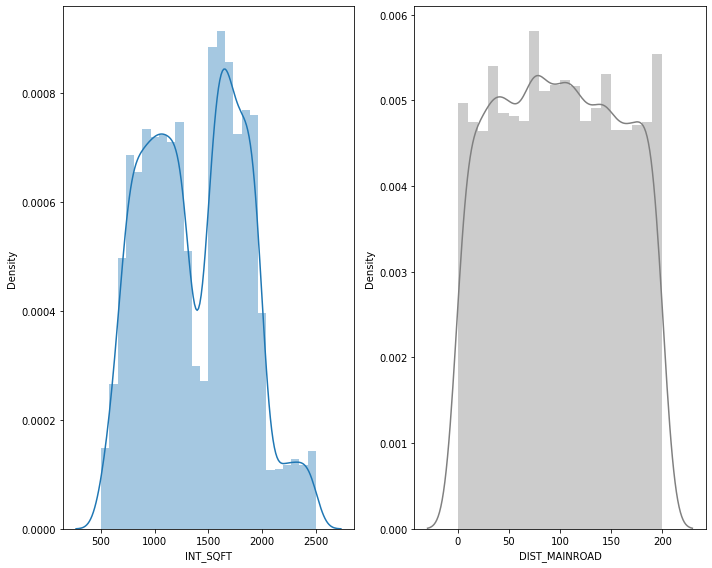

In [104]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(dataset.INT_SQFT)
plt.subplot(1,2,2)
sns.distplot(dataset.DIST_MAINROAD,color = 'grey')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


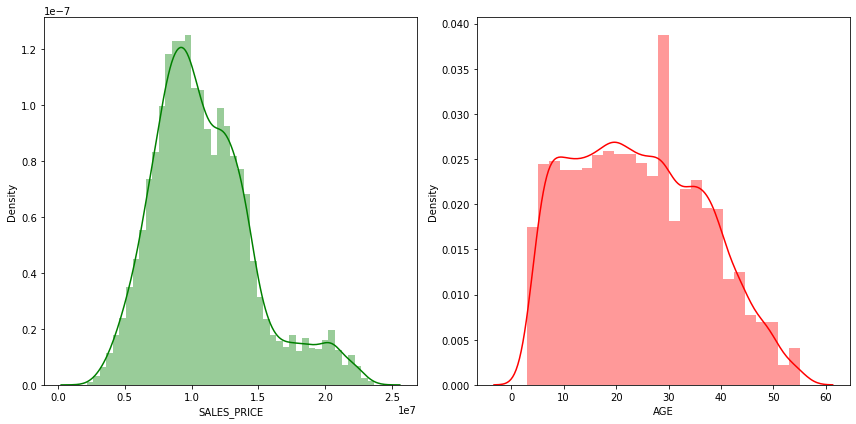

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset.SALES_PRICE,color='green')
plt.subplot(1,2,2)
sns.distplot(dataset.AGE,color='red')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


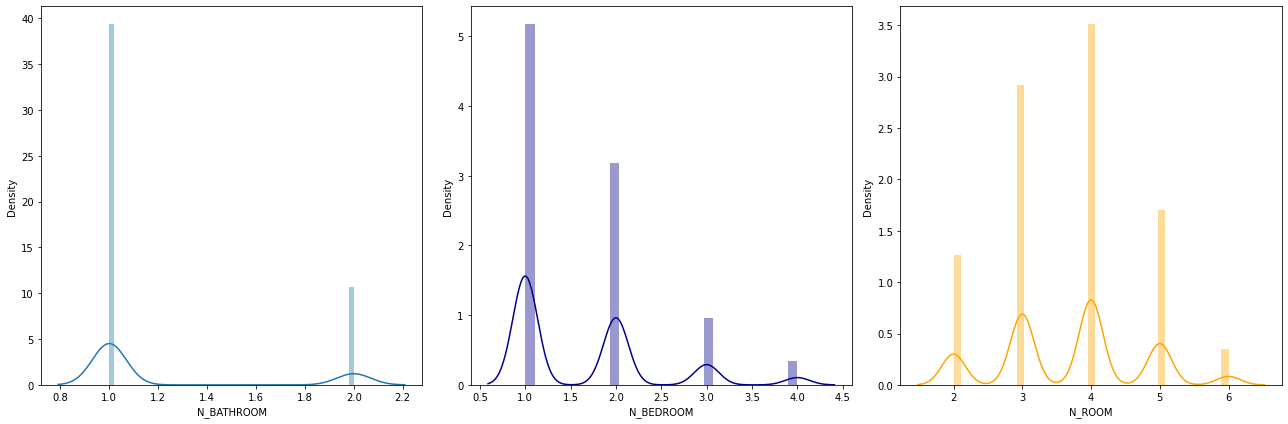

In [108]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(dataset.N_BATHROOM)
plt.subplot(1,3,2)
sns.distplot(dataset.N_BEDROOM,color = 'darkblue')
plt.subplot(1,3,3)
sns.distplot(dataset.N_ROOM,color = 'orange')
plt.tight_layout()
plt.show()

Above distribution shows that properties with 1 number of bathroom, 1 number of bedroom and 4 number of rooms are highly available in our dataset

In [111]:
import warnings
warnings.filterwarnings("ignore")

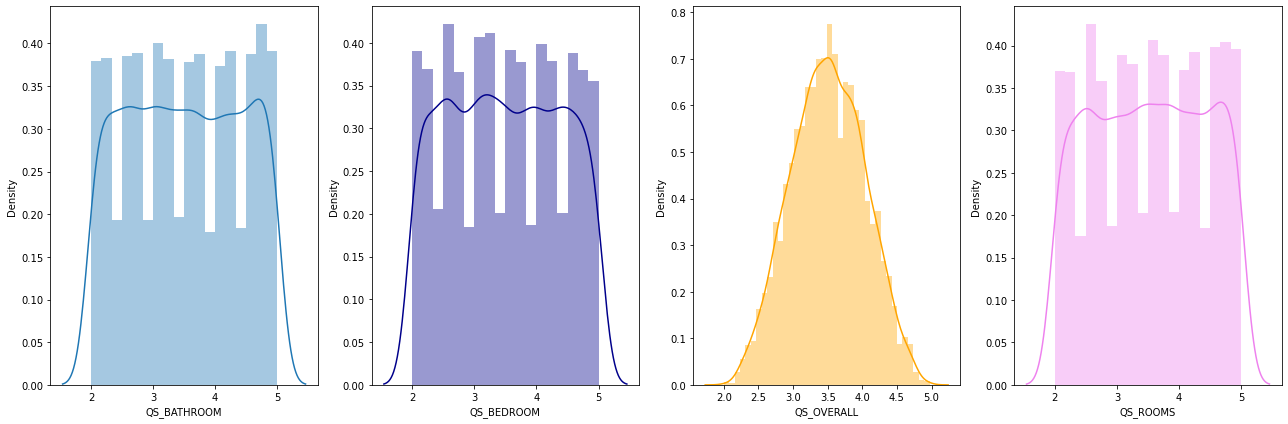

In [112]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.distplot(dataset.QS_BATHROOM)
plt.subplot(1,4,2)
sns.distplot(dataset.QS_BEDROOM,color = 'darkblue')
plt.subplot(1,4,3)
sns.distplot(dataset.QS_OVERALL,color = 'orange')
plt.subplot(1,4,4)
sns.distplot(dataset.QS_ROOMS,color = 'violet')
plt.tight_layout()
plt.show()

Based on above plots QS_BATHROOM,QS_BEDROOM & QS_ROOMS forms Uniform distribution while QS_OVERALL distribution forms a Normal distribution

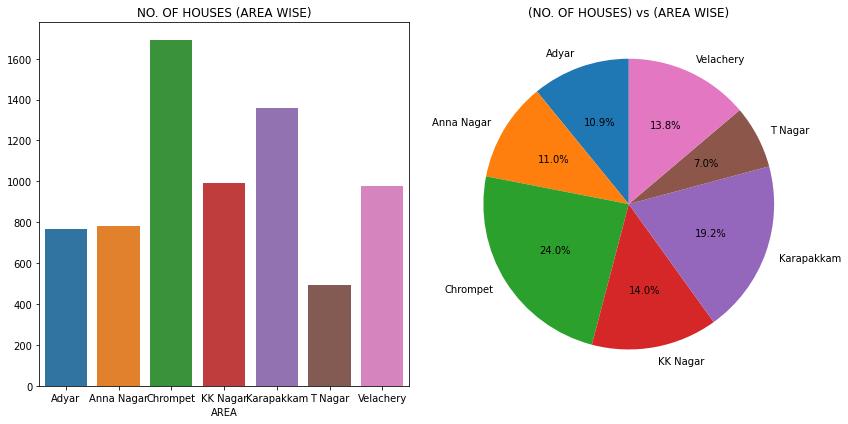

In [116]:
plt.figure(figsize=(12,6))
A=dataset['AREA'].groupby(dataset['AREA']).count()
a=[]
for i in A:
  r=(i/7061)*100
  a.append(r)
y=['Adyar','Anna Nagar','Chrompet','KK Nagar','Karapakkam','T Nagar','Velachery']

plt.subplot(1,2,1)
sns.barplot(x=A.index,y=A.values,data=dataset)
plt.title('NO. OF HOUSES (AREA WISE)')

plt.subplot(1,2,2)
plt.pie(a,labels=y,startangle=90,autopct='%1.1f%%')
plt.title('(NO. OF HOUSES) vs (AREA WISE)')

plt.tight_layout()
plt.show()

Above distribution shows Chrompet having the highest number of houses and T Nagar haveing the lowest number of houses

### We will look for the Features vs Target 

In [117]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDUP_YEAR', 'SALEON_YEAR', 'AGE'],
      dtype='object')

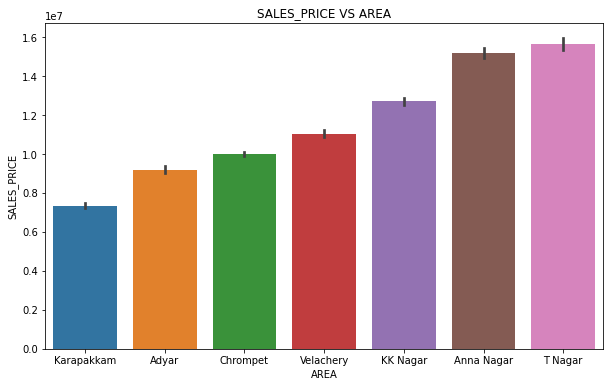

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('SALES_PRICE VS AREA')
plt.show()

AREA is one of the important feature that increases the SALES_PRICE


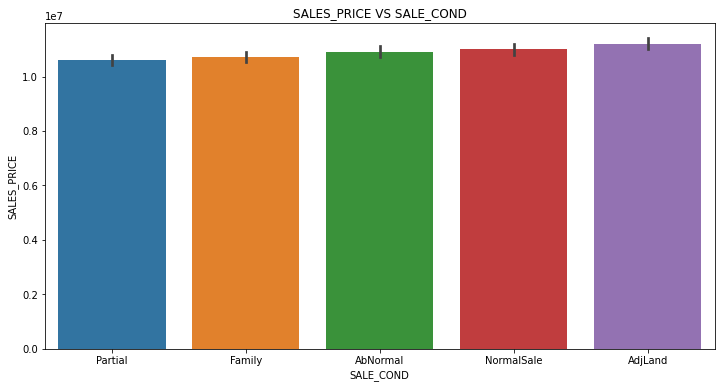

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALES_PRICE VS SALE_COND')

plt.show()

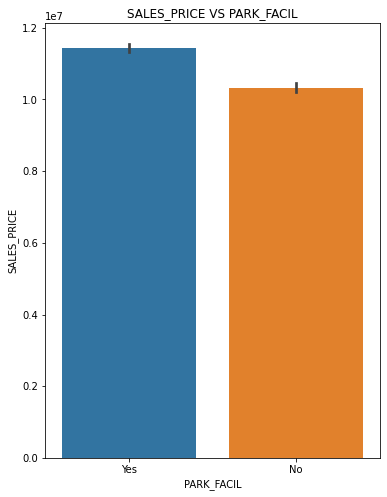

In [120]:
plt.figure(figsize=(6,8))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.title('SALES_PRICE VS PARK_FACIL')
plt.show()

Text(0.5, 1.0, 'SALES_PRICE VS BUILDTYPE WISE')

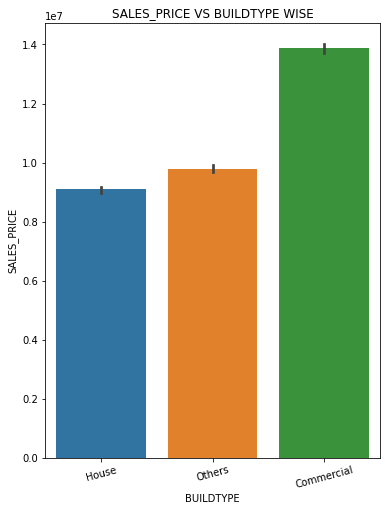

In [121]:
plt.figure(figsize=(6,8))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS BUILDTYPE WISE')

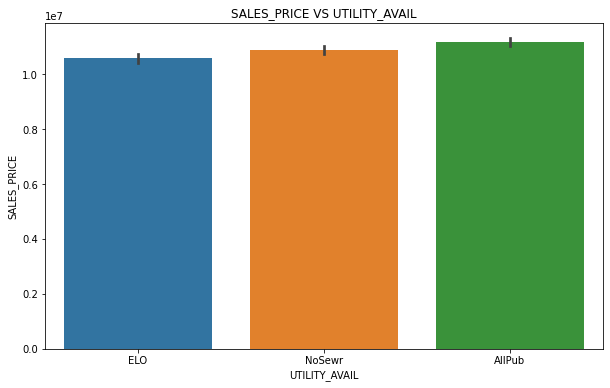

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('SALES_PRICE VS UTILITY_AVAIL')
plt.show()

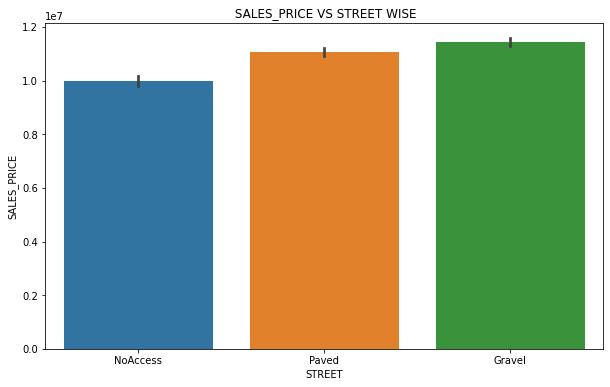

In [123]:
plt.figure(figsize=(10,6))
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title(' SALES_PRICE VS STREET WISE')
plt.show()

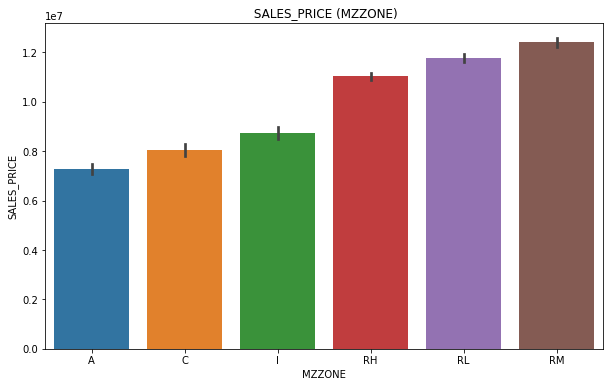

In [124]:
plt.figure(figsize=(10,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title(' SALES_PRICE (MZZONE)')
plt.show()

**Combining all Plots with SALES_PRICE**

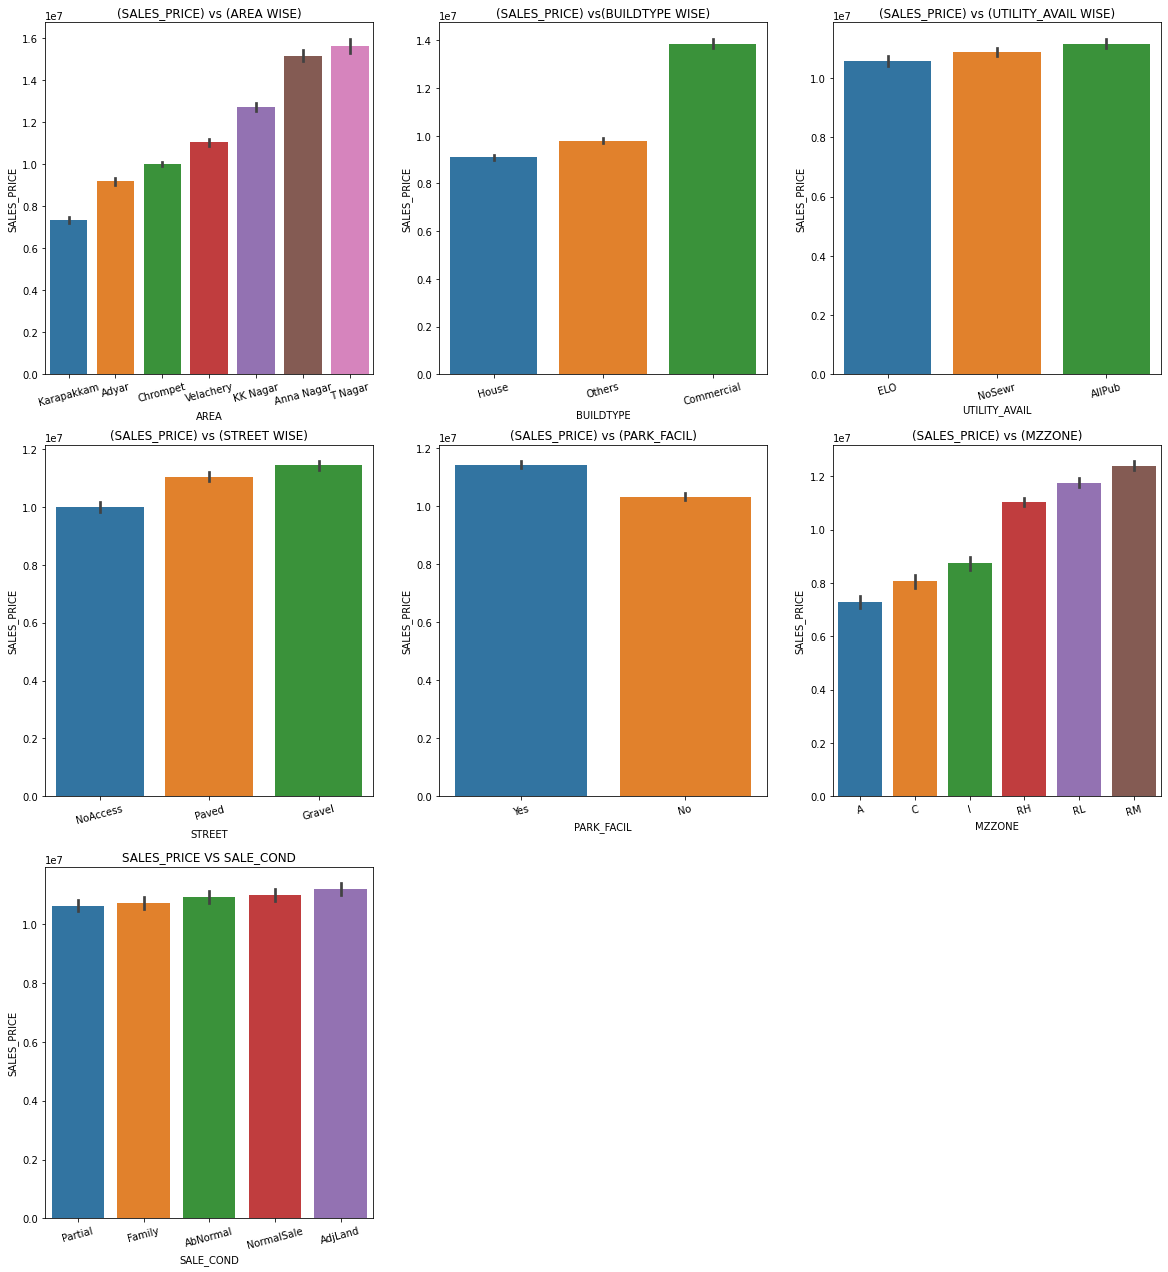

In [125]:
plt.figure(figsize=(20,22))
plt.subplot(3,3,1)
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (AREA WISE)')
plt.subplot(3,3,2)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs(BUILDTYPE WISE)')
plt.subplot(3,3,3)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (UTILITY_AVAIL WISE)')
plt.subplot(3,3,4)
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (STREET WISE)')
plt.subplot(3,3,5)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (PARK_FACIL)')
plt.subplot(3,3,6)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (MZZONE)')
plt.subplot(3,3,7)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS SALE_COND')
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from matplotlib import pyplot
import graphviz
from sklearn import tree

## **Approach to Feature Analysis**

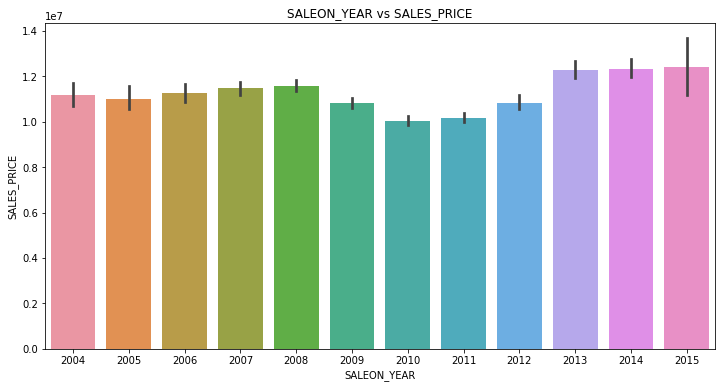

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALEON_YEAR',y='SALES_PRICE',data=dataset)
plt.title('SALEON_YEAR vs SALES_PRICE')
plt.show()

1. Rise in Sales from 2004 to 2008 
2. Fall in Sales from 2008 to 2010 
3. Gradual Rise in Sales from 2011 to 2015
4. Peak Sales is in the year 2015 
5. This shows year by year there is a increase in SALES_PRICE from 2011 onwards



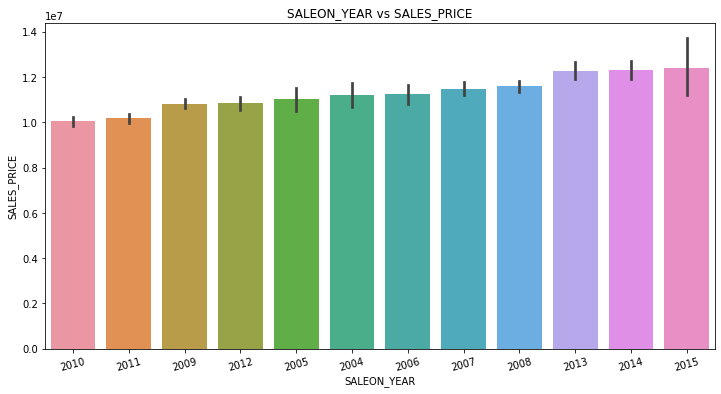

In [133]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALEON_YEAR',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALEON_YEAR')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALEON_YEAR'])
plt.xticks(rotation=15)
plt.title('SALEON_YEAR vs SALES_PRICE')
plt.show()

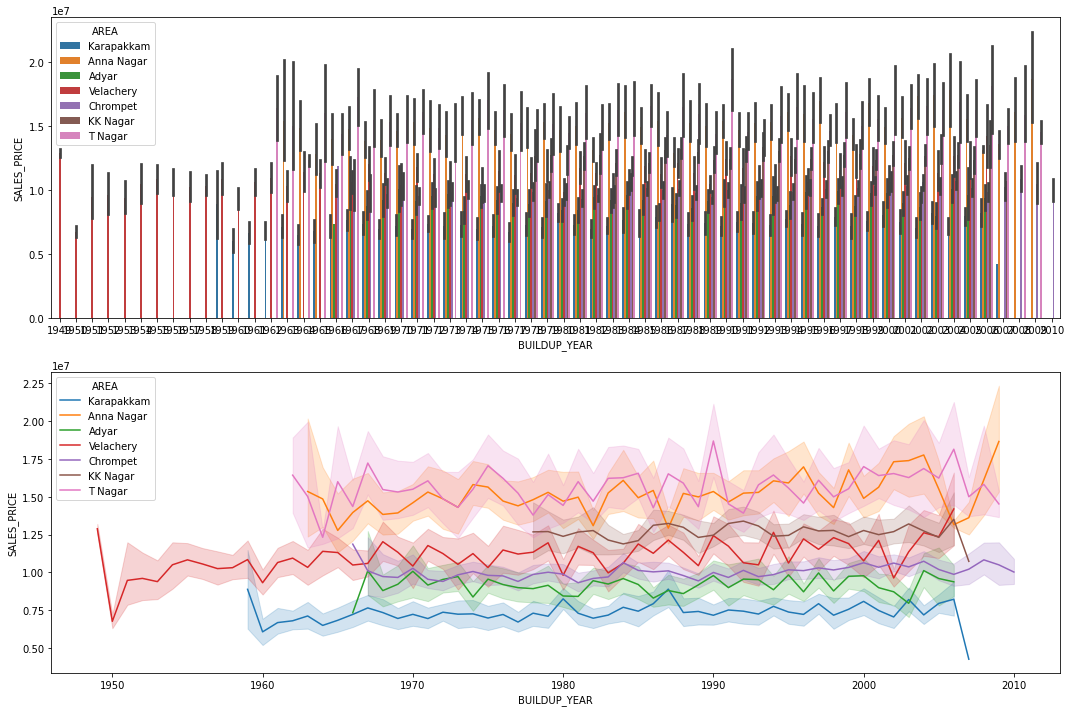

In [134]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "BUILDUP_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "BUILDUP_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')
plt.tight_layout()
plt.show()

### **Plot View Analysis**

1. Karappakkam : Lowest Sales 
2. Anna Nagar : Top Sales Area 
3. Adyar : Second Sales Area
4. Velachery : Third Sales Area
5. Chrompet : Fourth Sales Area 
6. KK Nagar : Fifth Sales Area 
7. T Nagar : Sixth Sales Area 

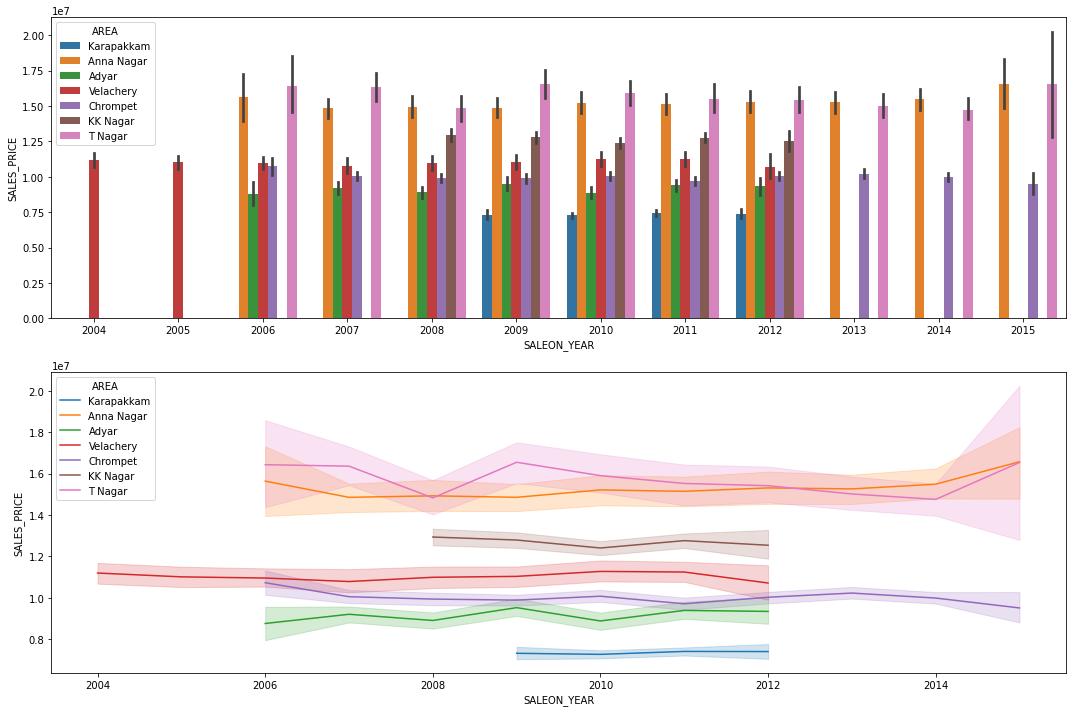

In [136]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "SALEON_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "SALEON_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.tight_layout()
plt.show()

### Features and Target Relationship 

In [137]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDUP_YEAR,SALEON_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


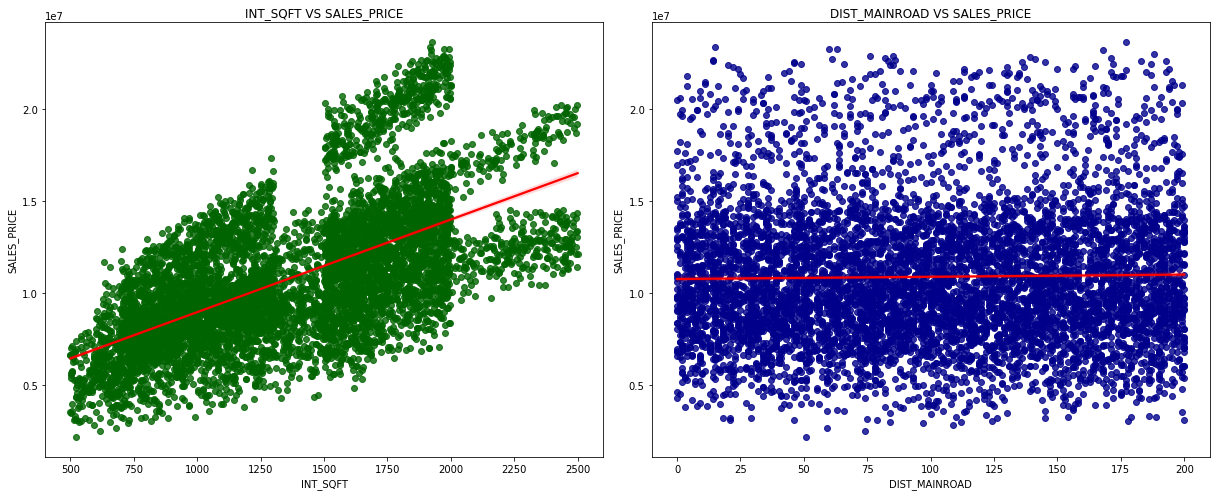


              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612747
SALES_PRICE  0.612747     1.000000

                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018269
SALES_PRICE         0.018269     1.000000


In [138]:
plt.figure(figsize=(17,7))

plt.subplot(121)
sns.regplot(x=dataset['INT_SQFT'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('INT_SQFT VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['DIST_MAINROAD'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('DIST_MAINROAD VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['INT_SQFT','SALES_PRICE']].corr())
print('\n',dataset[['DIST_MAINROAD','SALES_PRICE']].corr())

As DIST_MAINROAD is not having linear relationship with SALES_YEAR, will drop DIST_MAINROAD

In [140]:
dataset=dataset.drop(['DIST_MAINROAD'],axis=1)

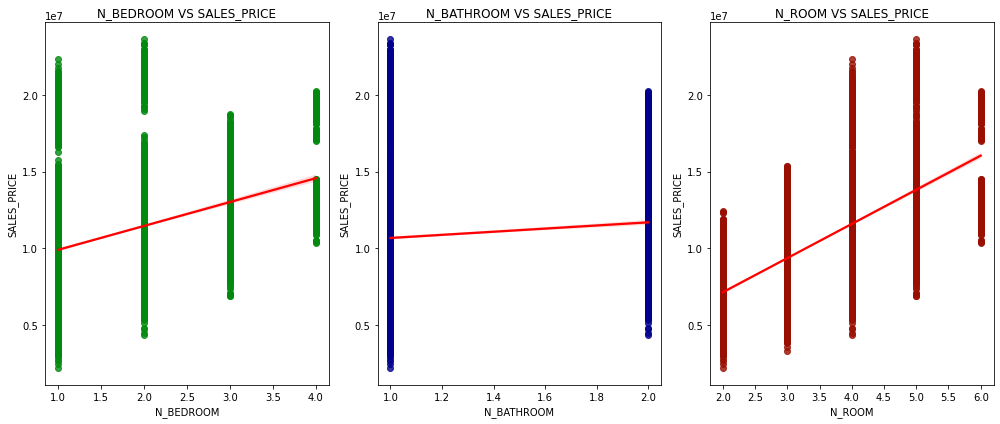


              N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.332609
SALES_PRICE   0.332609     1.000000

              N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.110896
SALES_PRICE    0.110896     1.000000

               N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60352
SALES_PRICE  0.60352      1.00000


In [141]:
plt.figure(figsize=(14,6))

plt.subplot(131)
sns.regplot(x=dataset['N_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#02890F'},line_kws={'color':'red'})
plt.title('N_BEDROOM VS SALES_PRICE')

plt.subplot(132)
sns.regplot(x=dataset['N_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('N_BATHROOM VS SALES_PRICE')

plt.subplot(133)
sns.regplot(x=dataset['N_ROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#990F02'},line_kws={'color':'red'})
plt.title('N_ROOM VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['N_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_ROOM','SALES_PRICE']].corr())

In [142]:
dataset['TRANS_N_BATHROOM']  = np.log(dataset['N_BATHROOM'])
print(dataset[['TRANS_N_BATHROOM','SALES_PRICE']].corr())
dataset=dataset.drop(['TRANS_N_BATHROOM'],axis=1)

                  TRANS_N_BATHROOM  SALES_PRICE
TRANS_N_BATHROOM          1.000000     0.110896
SALES_PRICE               0.110896     1.000000


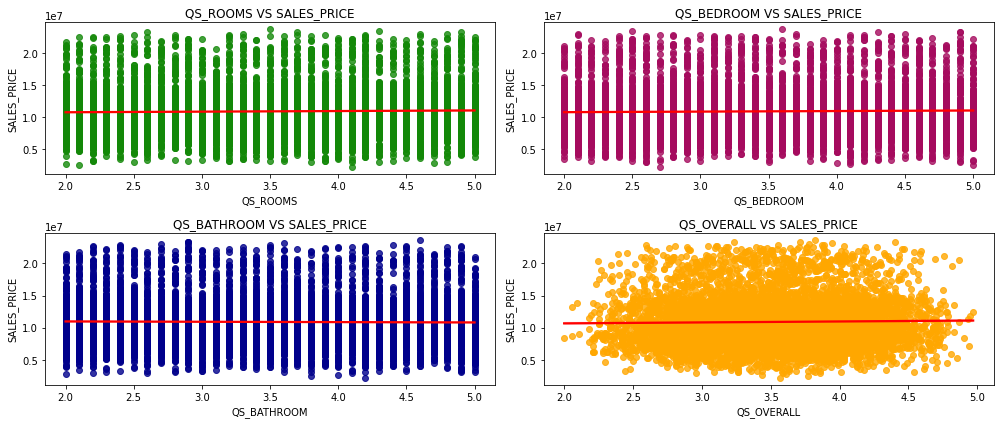


              QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.022275
SALES_PRICE  0.022275     1.000000

              QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.020413
SALES_PRICE    0.020413     1.000000

              QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.012363
SALES_PRICE    -0.012363     1.000000

              QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020556
SALES_PRICE    0.020556     1.000000


In [143]:
plt.figure(figsize=(14,6))

plt.subplot(221)
sns.regplot(x=dataset['QS_ROOMS'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#138808'},line_kws={'color':'red'})
plt.title('QS_ROOMS VS SALES_PRICE')

plt.subplot(222)
sns.regplot(x=dataset['QS_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#A50B5E'},line_kws={'color':'red'})
plt.title('QS_BEDROOM VS SALES_PRICE')

plt.subplot(223)
sns.regplot(x=dataset['QS_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('QS_BATHROOM VS SALES_PRICE')

plt.subplot(224)
sns.regplot(x=dataset['QS_OVERALL'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#FFA700'},line_kws={'color':'red'})
plt.title('QS_OVERALL VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['QS_ROOMS','SALES_PRICE']].corr())
print('\n',dataset[['QS_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_OVERALL','SALES_PRICE']].corr())

Based on above indication, we can see there s no relationship and there is no linear relation columns with SALES_PRICE

Hence we will drop QS_ROOMS, QS_BEDROOM, QS_BATHROOM and QS_OVERALL columns

In [144]:
dataset=dataset.drop(['QS_ROOMS', 'QS_BEDROOM', 'QS_BATHROOM','QS_OVERALL'],axis=1)

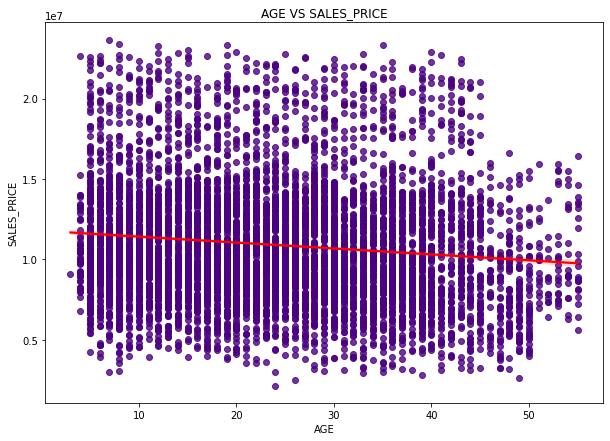

                  AGE  SALES_PRICE
AGE          1.000000    -0.120544
SALES_PRICE -0.120544     1.000000


In [145]:
plt.figure(figsize=(10,7))
sns.regplot(x=dataset['AGE'],y=dataset['SALES_PRICE'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})
plt.title('AGE VS SALES_PRICE')
plt.show()

print(dataset[['AGE','SALES_PRICE']].corr())

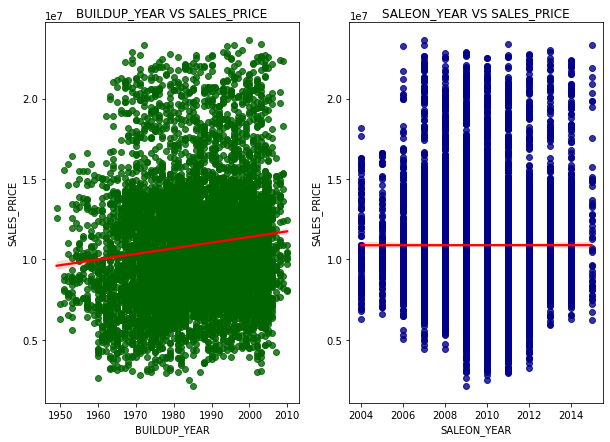


               BUILDUP_YEAR  SALES_PRICE
BUILDUP_YEAR      1.000000     0.117587
SALES_PRICE       0.117587     1.000000

              SALEON_YEAR  SALES_PRICE
SALEON_YEAR     1.000000     0.000368
SALES_PRICE     0.000368     1.000000


In [146]:
plt.figure(figsize=(10,7))

plt.subplot(121)
sns.regplot(x=dataset['BUILDUP_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('BUILDUP_YEAR VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['SALEON_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('SALEON_YEAR VS SALES_PRICE')
plt.show()

print('\n',dataset[['BUILDUP_YEAR','SALES_PRICE']].corr())
print('\n',dataset[['SALEON_YEAR','SALES_PRICE']].corr())


Based on above visuals, we can see BUILDUP_YEAR have relation and close to linear relation with the SALES_PRICE


SALEON_YEAR has no relation and no linear relation with SALES_PRICE, so we will drop that column

In [148]:
dataset=dataset.drop(['SALEON_YEAR'],axis=1)

### **SALES PRICE Analysis using BUILDTYPE Min,Max,Max Pricing**

In [149]:
buildtype_fltr_C = dataset['BUILDTYPE']=='Commercial'
commercial=dataset.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Mean_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = dataset['BUILDTYPE']=='House'
House=dataset.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = dataset['BUILDTYPE']=='Others'
Others=dataset.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Buildtype_mmm = pd.concat([comm,house,others],axis=1)
Buildtype_mmm = pd.DataFrame(Buildtype_mmm.T)
Buildtype_mmm["Build_type"]=["Commercial","House","Others"]

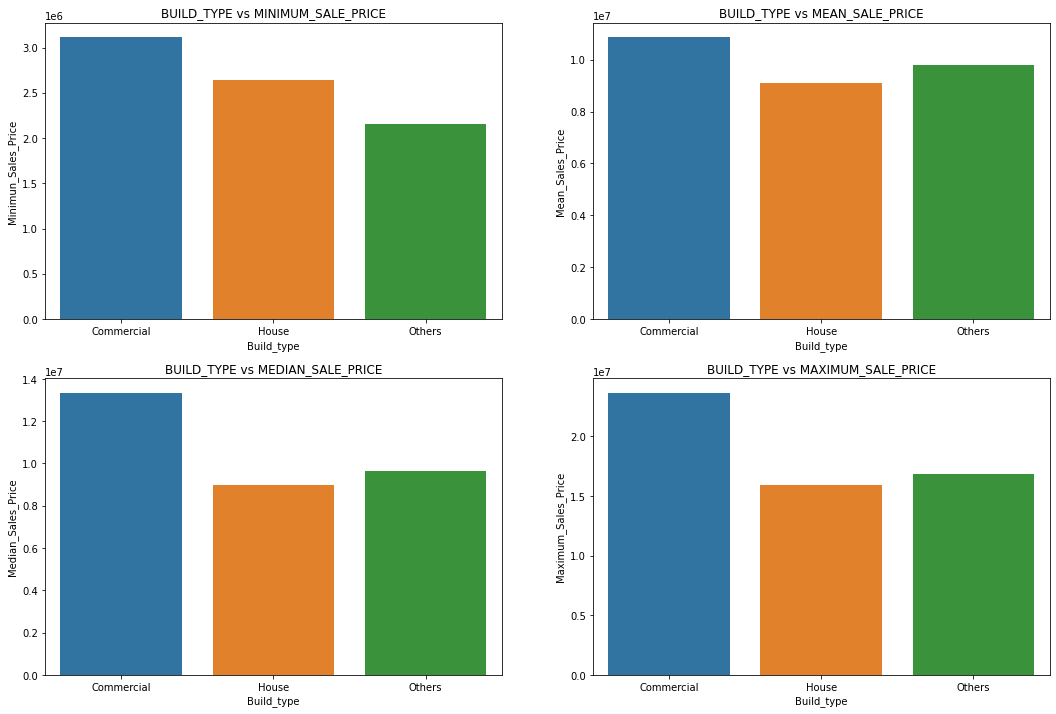

In [150]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Mean_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEAN_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

Ranking Order of Property Types:

1. Commercial - 1st Place [in terms of mean,median, min and max] 
2. House - 2nd Place [in terms of max,mean and mode of sales price]
3. Others - 3rd Place [in terms of mean,median,min and max]

Commercial type is the best one for sellers.


### **SALES PRICE Analysis using AREA Min,Max,Max Pricing**

In [151]:
mean=dataset.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=dataset.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=dataset.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=dataset.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karappakam","T Nagar","Velachery"]

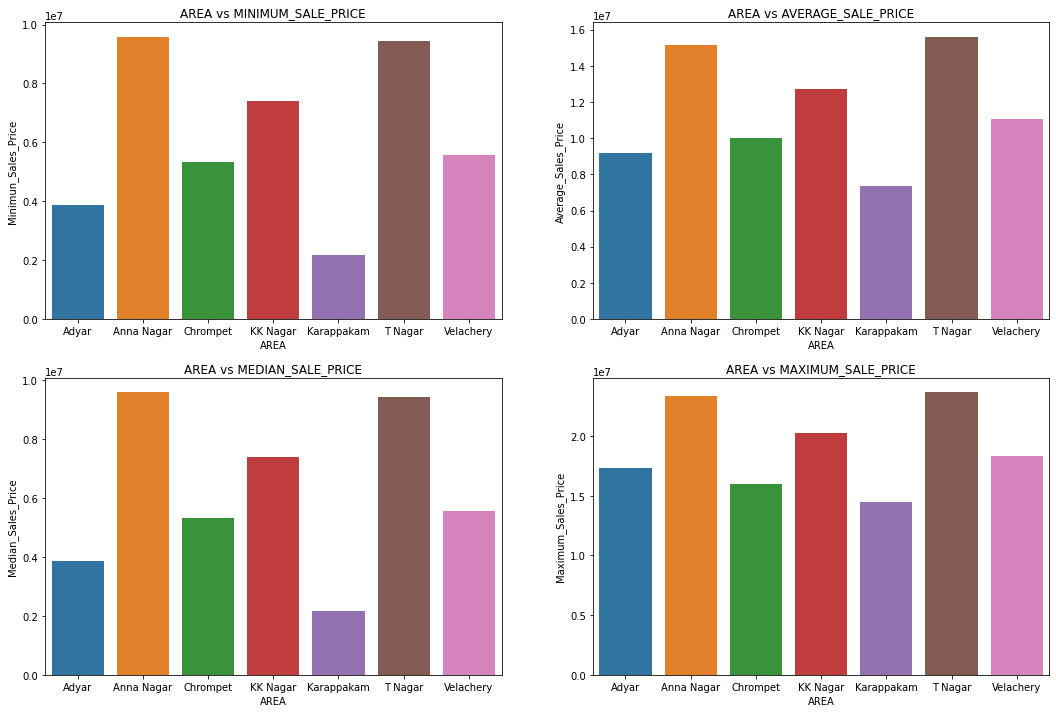

In [152]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

Minimum Sales Price from low-to-high:
  Karappakam > Adyar > Chrompet > Velachery > KK Nagar > T Nagar > Anna Nagar

Average Sales Price from low-to-high:
  Karappakam > Adyar > Chrompet > Velachery > KK Nagar > Annanagar > T Nagar

Median Sales Price from low-to-high:
  Karappakam > Adyar > Chrompet > Velachery > KK Nagar > T Nagar > Anna Nagar

Maximum Sales Price from low-to-high:
  Karappakam > Chrompet > Adyar > Velachery > KKNagar > Anna Nagar > T Nagar

Top & Prime place for Sellers : T Nagar and Anna Nagar 

In [154]:
mean=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karappakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karappakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karappakam","T Nagar","Velachery"]

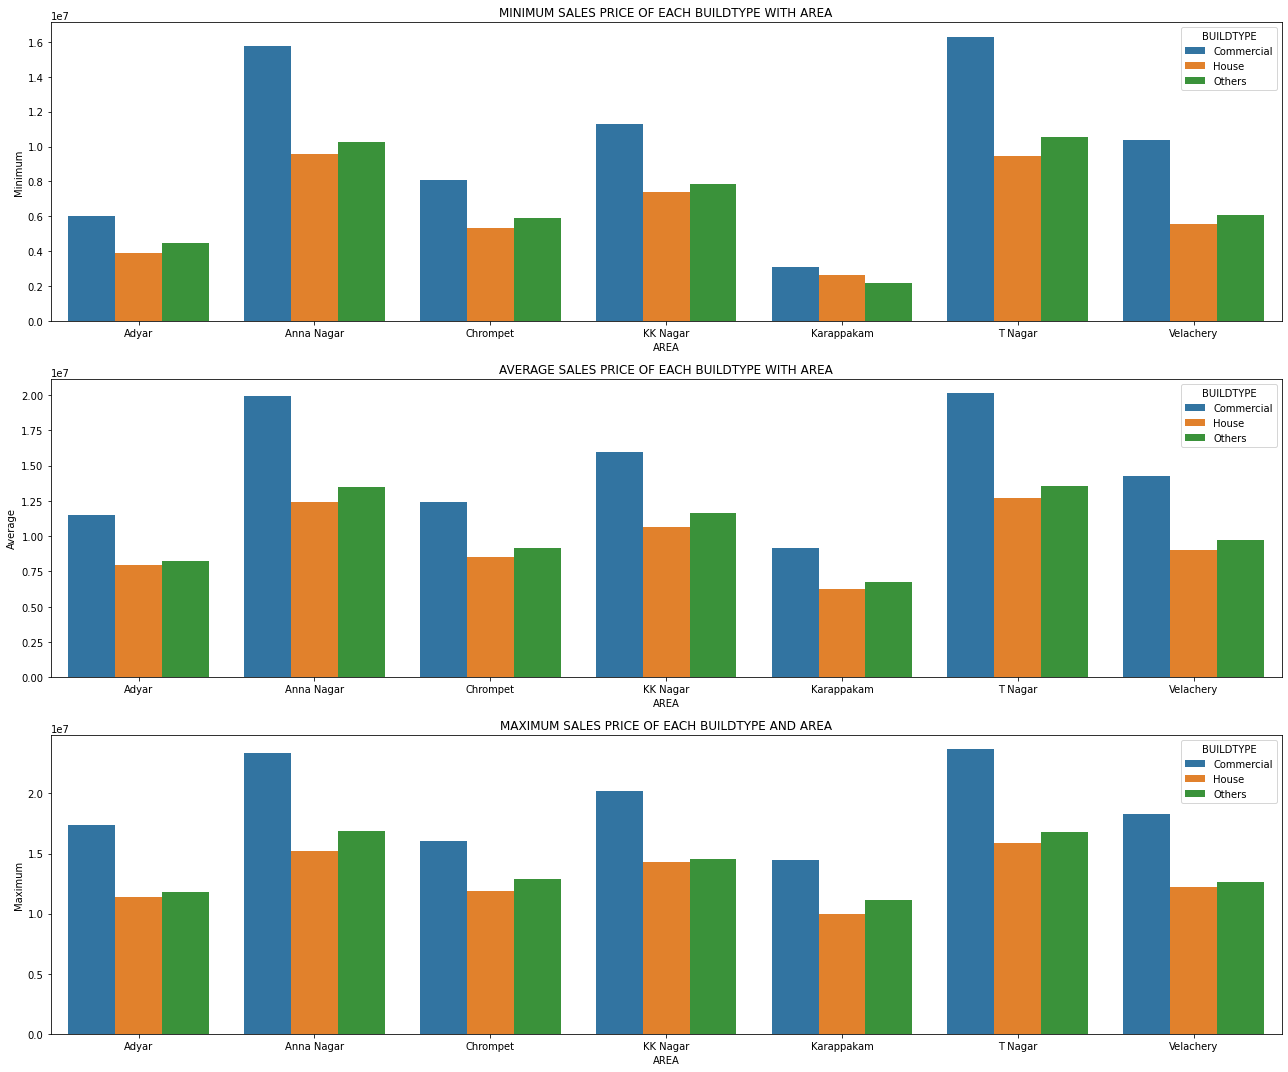

In [155]:
plt.figure(figsize=(18,15))

plt.subplot(311)
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(312)
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(313)
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')

plt.tight_layout()
plt.show()

Based on above visuals, we can see.,

Highest Level of Sales Price : T Nagar and Anna Nagar 

Average Level of Sales Price : KK Nagar, Velachery and Chrompet 

Lowest Level of Sales Price : Karapakkam and Adyar 

In [156]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILDUP_YEAR', 'AGE'],
      dtype='object')

In [157]:
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDUP_YEAR,AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,1967,44
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,1995,11
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,1992,20
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,1988,22
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,1979,30


In [158]:
dataset['AREA']=dataset['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
dataset['SALE_COND']=dataset['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'NormalSale':4,'AdjLand':5})
dataset['PARK_FACIL']=dataset['PARK_FACIL'].map({'Yes':1,'No':0})
dataset['BUILDTYPE']=dataset['BUILDTYPE'].map({'House':1,'Others':2,'Commercial':3})
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].map({'ELO':1,'NoSewa':2,'NoSewr':3,'AllPub':4})
dataset['STREET']=dataset['STREET'].map({'NoAccess':1,'Paved':2,'Gravel':3})
dataset['MZZONE']=dataset['MZZONE'].map({ 'A':1, 'C':2, 'I':3, 'RH':4, 'RL':5,'RM':6})
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDUP_YEAR,AGE
0,1,1004,1,1,3,3,1,3,4,2,1,7600000,1967,44
1,6,1986,2,1,5,3,0,3,4,3,4,21717770,1995,11
2,2,909,1,1,3,3,1,3,1,3,5,13159200,1992,20
3,4,1855,3,2,5,2,0,2,3,2,3,9630290,1988,22
4,1,1226,1,1,3,3,1,2,4,3,2,7406250,1979,30


### **Target vs Feature Selection**

In [159]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILDUP_YEAR', 'AGE'],
      dtype='object')

In [161]:
#FEATURES
X=dataset[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDUP_YEAR', 'AGE']].values
#TARGET
Y=dataset['SALES_PRICE'].values

### **Data Splitting**

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

### **Data Scaling**

In [164]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## **Model Fitting**

### **Linear Regression Model**

In [194]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [195]:
y_test=Y_test
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.320613e+07
1,16053550,1.678606e+07
2,18670480,1.720800e+07
3,6468090,6.117875e+06
4,10732635,1.037285e+07
...,...,...
1408,10441050,9.324551e+06
1409,8595550,1.027508e+07
1410,10721350,1.079943e+07
1411,12114895,1.096498e+07


In [196]:
coeff_df = pd.DataFrame(lr.coef_,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDUP_YEAR', 'AGE'], columns=['Coefficient'])
y_pred = lr.predict(X_test)
coeff_df

,Coefficient
AREA,1.073352e+06
INT_SQFT,6.389031e+05
N_BEDROOM,-1.250929e+06
N_BATHROOM,1.020657e+05
N_ROOM,1.769089e+06
SALE_COND,2.041187e+05
PARK_FACIL,5.042504e+05
BUILDTYPE,1.906433e+06
UTILITY_AVAIL,6.785261e+04
STREET,3.901428e+05


In [197]:
lr.intercept_

10905607.450424928

In [198]:
print('R2- SCORE:', metrics.r2_score(y_test,lr.predict(X_test)))

R2- SCORE: 0.8810296787639911


### **Random Forest Model**

In [171]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [172]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12629907.45
1,16053550,14614618.00
2,18670480,18122258.20
3,6468090,7329628.95
4,10732635,10454035.60
...,...,...
1408,10441050,10007863.45
1409,8595550,8585733.10
1410,10721350,11674814.20
1411,12114895,11962404.00


In [173]:
print('RF r2_score 1:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 1: 0.9879984931104677


In [174]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4)

In [175]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.117841e+07
1,16053550,1.363813e+07
2,18670480,1.747744e+07
3,6468090,9.308741e+06
4,10732635,9.308741e+06
...,...,...
1408,10441050,9.308741e+06
1409,8595550,7.704523e+06
1410,10721350,1.363813e+07
1411,12114895,1.238603e+07


[(0.5377148337946566, 'AREA'),
 (0.08268194287965018, 'INT_SQFT'),
 (0.002017484217185236, 'N_BEDROOM'),
 (0.0028778586757738007, 'N_BATHROOM'),
 (0.0024133274358278437, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0, 'PARK_FACIL'),
 (0.3677545875485766, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.004539965448329819, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

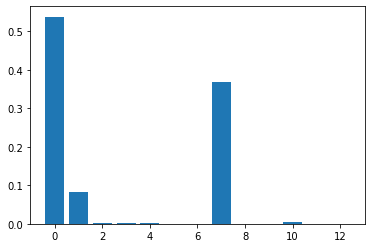

In [176]:
importance = rf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

In [177]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.54
Variable: BUILDTYPE            Importance: 0.37
Variable: INT_SQFT             Importance: 0.08
Variable: N_BEDROOM            Importance: 0.0
Variable: N_BATHROOM           Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: PARK_FACIL           Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: MZZONE               Importance: 0.0
Variable: BUILD_YEAR           Importance: 0.0
Variable: AGE                  Importance: 0.0


In [178]:
print('RF r2_score 2:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 2: 0.892137740614297


### **XG Boost Model**

In [179]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [180]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3742335930991094  Cross-Val score :  -0.38479936830083705
Learning rate :  0.02  Train score :  0.7476489452943773  Cross-Val score :  0.7435336826771171
Learning rate :  0.03  Train score :  0.9252836028182734  Cross-Val score :  0.9222973135309142
Learning rate :  0.04  Train score :  0.962415717317962  Cross-Val score :  0.9597753989237321
Learning rate :  0.05  Train score :  0.9746944093650557  Cross-Val score :  0.9723474108840824
Learning rate :  0.06  Train score :  0.9805418749969361  Cross-Val score :  0.9787747789951501
Learning rate :  0.07  Train score :  0.9851722461984276  Cross-Val score :  0.9829373297297572
Learning rate :  0.08  Train score :  0.9879956550547918  Cross-Val score :  0.9863153459058005
Learning rate :  0.09  Train score :  0.9899590410653593  Cross-Val score :  0.9885929377816526
Learning rate :  0.1  Train score :  0.9918303921421338  Cross-Val score :  0.9904945290817931
Learning rate :  0.11  Train score :  0

In [181]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
xgb.fit(x_train,y_train)

[22:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [182]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12715154.0
1,16053550,16104562.0
2,18670480,18402490.0
3,6468090,6592322.0
4,10732635,10741370.0
...,...,...
1408,10441050,10467862.0
1409,8595550,8315953.5
1410,10721350,10855640.0
1411,12114895,11943450.0


In [183]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.9963213990166053


## **Identifying the Best Model for Chennai House Price Prediction**

In [199]:
print("Linear Regression model's Rsquared metric:", metrics.r2_score(y_test,lr.predict(X_test)))
print("Random Forest Regressor Model's Rsquared metric:",metrics.r2_score(y_test,rf.predict(X_test)))
print("XG Boost Model's Rsquared metric:",metrics.r2_score(y_test,xgb.predict(X_test)))



Linear Regression model's Rsquared metric: 0.8810296787639911
Random Forest Regressor Model's Rsquared metric: 0.892137740614297
XG Boost Model's Rsquared metric: 0.9963518404556494


### **Comparing all other models, XG Boost Model is the best and efficient model**

### **Solution**

1. Factors that fetch more money for the House
    
       Area and Build Type are the most Important Features 

2. Build Type that fetches more money   
      
        Commercial Build type is yields more money than Houses

3. Best places to build homes
 
        T Nagar and Anna Nagar is the best place for real estate people
        






### **Below is the Forecast Range (range of permissible values) for Customer's Negotiatation**

In [200]:
mmm_df

Minimum       Average      Median   Maximum  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.152774e+07  11233565.0  17360470   
           Anna Nagar  15754040  1.994391e+07  20020970.0  23407860   
           Chrompet     8071050  1.238208e+07  12454750.0  16026600   
           KK Nagar    11286720  1.597558e+07  16197860.0  20246360   
           Karapakkam   3120000  9.171470e+06   9345250.0  14486250   
           T Nagar     16300260  2.013224e+07  20419750.0  23667340   
           Velachery   10391900  1.426069e+07  14239220.0  18298710   
House      Adyar        3869180  7.972134e+06   7953190.0  11409485   
           Anna Nagar   9593040  1.240167e+07  12352710.0  15237150   
           Chrompet     5340900  8.553965e+06   8548150.0  11845200   
           KK Nagar     7410200  1.066954e+07  10652120.0  14276060   
           Karapakkam   2640250  6.270667e+06   6309000.0   9966750   
           T Nagar      9433610  1.267075e+07  12691985.0  15880930   
           Velachery    5574400  9.033310e+06   8993590.0  12247960   
Others     Adyar        4456285  8.205278e+06   8179590.0  11818860   
           Anna Nagar  10245090  1.347747e+07  13393255.0  16859010   
           Chrompet     5925790  9.149409e+06   9171700.0  12851040   
           KK Nagar     7826780  1.164412e+07  11643600.0  14521700   
           Karapakkam   2156875  6.727557e+06   6677937.5  11117625   
           T Nagar     10573780  1.355864e+07  13754600.0  16766120   
           Velachery    6074780  9.730105e+06   9689440.0  12669880   

                        BUILDTYPE        AREA  
BUILDTYPE  AREA                                
Commercial Adyar       Commercial       Adyar  
           Anna Nagar  Commercial  Anna Nagar  
           Chrompet    Commercial    Chrompet  
           KK Nagar    Commercial    KK Nagar  
           Karapakkam  Commercial  Karappakam  
           T Nagar     Commercial     T Nagar  
           Velachery   Commercial   Velachery  
House      Adyar            House       Adyar  
           Anna Nagar       House  Anna Nagar  
           Chrompet         House    Chrompet  
           KK Nagar         House    KK Nagar  
           Karapakkam       House  Karappakam  
           T Nagar          House     T Nagar  
           Velachery        House   Velachery  
Others     Adyar           Others       Adyar  
           Anna Nagar      Others  Anna Nagar  
           Chrompet        Others    Chrompet  
           KK Nagar        Others    KK Nagar  
           Karapakkam      Others  Karappakam  
           T Nagar         Others     T Nagar  
           Velachery       Others   Velachery

### **Forecast range [Range of Permissible Values]**

 Based on the above table, we can know the Sales-price range of each area based on the Build type.
 
 If a buyer wants to purchase a commercial property from Adyar - then the.,

 >>> Minimum Price of property is ₹60,36,800.00

 >>> Average Price of property is ₹1,12,33,565.00

 >>> Maximum price of property is ₹1,73,60,470.00 


        
#  